# Feature Extraction

Erfasser :


| Name | Matrikelnummer | E-Mail |
| :- | :- | :- |
| **Muhammad Abiyyu Mufti Hanif** | 60750 | hamu1013@h-ka.de |
| **Davin Farrell Lukito** | 75420 | luda1013@h-ka.de |

In [1]:
import cv2

from preprocessing.features_extraction import ContoursDetection, \
    CornerHarrisDetection, CornersDetection, thresholding_image
import matplotlib.pyplot as plt
import time
import numpy as np

## Loading Image to test the feature extraction

In [2]:
start = time.perf_counter()
my_image = cv2.imread("resources/Brush/image_20.png")
img_gray = cv2.cvtColor(my_image, cv2.COLOR_BGR2GRAY)
end = time.perf_counter()
print("Loading Image - Execution time: ", end - start)

Loading Image - Execution time:  0.005222799999999417


## Detect corners using built-in "good feature to track"

Corners Detection Good Feature To Track - Execution time:  0.06154279999999979


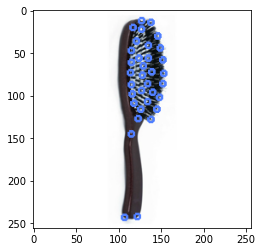

In [3]:
start = time.perf_counter()
CD = CornersDetection(img_gray, my_image.copy())
CD.get_corners()
plt.imshow(CD.image)
end = time.perf_counter()
print("Corners Detection Good Feature To Track - Execution time: ", end - start)

## Detect corners using built-in "harrist corner"

Execution time:  0.05829929999999983


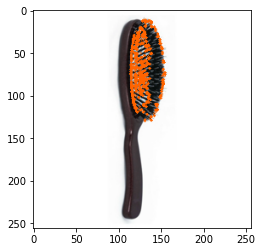

In [4]:
start = time.perf_counter()
CH = CornerHarrisDetection(img_gray, my_image.copy())
CH.get_harris_corners()
plt.imshow(CH.image)
end = time.perf_counter()
print("Execution time: ", end - start)

## Contour Detection
- Thresholding and filter image
- Detect contour
- The biggest contour (but not the image boundary) will be extracted
- Calculate Perimiter Length and Draw Rectangle, Hull, and Approximate Area


bright image
Contour Detection - Execution time:  0.05208450000000031


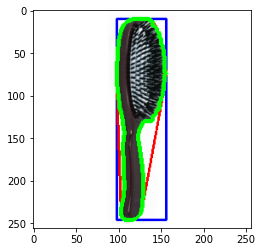

In [5]:
start = time.perf_counter()
mean_of_gray_image = np.mean(img_gray)
if mean_of_gray_image < 180:
    # Image is dark
    print("dark image")
    contour_recognition_threshold = 120
else:
    print("bright image")
    # Image is bright
    contour_recognition_threshold = 200

# thresholding
img_thresh = thresholding_image(img_gray, contour_recognition_threshold)
CN = ContoursDetection(img_thresh, my_image.copy())
CN.get_biggest_contour()
CN.contour_features()
plt.imshow(CN.image)
end = time.perf_counter()
print("Contour Detection - Execution time: ", end - start)

## Example calling everything one by one

One by One Execution time:  0.018162000000000234


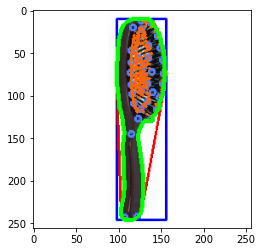

In [6]:
img = my_image.copy()
F1 = CornersDetection(img_gray, img)
F2 = CornerHarrisDetection(img_gray, img)
F3 = ContoursDetection(img_thresh, img)

start = time.perf_counter()

F1.get_corners()
F2.get_harris_corners()
F3.get_biggest_contour()
F3.contour_features()

end = time.perf_counter()
plt.imshow(F1.image)
print("One by One Execution time: ", end - start)

## Example calling everything one by one in a for loop

In [7]:
a = CornersDetection(img_gray)
b = CornerHarrisDetection(img_gray)
c = ContoursDetection(img_thresh)
featuresExtraction = [a, b, c]
start = time.perf_counter()
for F in featuresExtraction:
    F.preprocess()
end = time.perf_counter()
print("One by One Execution time: ", end - start)

One by One Execution time:  0.019623000000000168


In [8]:
features_extracted = {
    'n_corner': a.number_of_corners,
    'n_h_corner': b.number_of_corners,
    'n_contour': c.contours_numbers,
    'a_rect': c.rect_area,
    'a_hull': c.hull_area,
    'a_approx': c.approximation_area,
    'l_perimeters': c.contour_perimeters,
    'wide/length': c.wide/c.length,
    'perim/a_rect': c.contour_perimeters/c.rect_area,
    'perim/a_hull': c.contour_perimeters/c.hull_area,
    'perim/a_appx': c.contour_perimeters/c.approximation_area,
    'corner/a_rect': a.number_of_corners/c.rect_area,
    'corner/a_hull': a.number_of_corners/c.hull_area,
    'corner/a_appx': a.number_of_corners/c.approximation_area,
    'corner/l_perim': a.number_of_corners/c.contour_perimeters,
    'h_corner/a_rect': b.number_of_corners/c.rect_area,
    'h_corner/a_hull': b.number_of_corners/c.hull_area,
    'h_corner/a_appx': b.number_of_corners/c.approximation_area,
    'h_corner/l_perim': b.number_of_corners/c.contour_perimeters,
    'extent': c.approximation_area/c.rect_area,
    'solidity': c.approximation_area/c.hull_area
}
import pprint

pprint.pprint(features_extracted)

{'a_approx': 8287.0,
 'a_hull': 10108.5,
 'a_rect': 13688.0,
 'corner/a_appx': 0.004102811632677688,
 'corner/a_hull': 0.003363505960330415,
 'corner/a_rect': 0.002483927527761543,
 'corner/l_perim': 0.06066545096235625,
 'extent': 0.6054208065458796,
 'h_corner/a_appx': 0.09195124894412936,
 'h_corner/a_hull': 0.07538210416975813,
 'h_corner/a_rect': 0.055669199298655755,
 'h_corner/l_perim': 1.3596198127445724,
 'l_perimeters': 560.4507913589478,
 'n_contour': 2,
 'n_corner': 34,
 'n_h_corner': 762,
 'perim/a_appx': 0.06763011842149726,
 'perim/a_hull': 0.0554435169766976,
 'perim/a_rect': 0.04094468084153622,
 'solidity': 0.8198051145075926,
 'wide/length': 0.2457627118644068}


In [9]:
import pandas as pd
df = pd.DataFrame.from_dict([features_extracted])
df.head()

,n_corner,n_h_corner,n_contour,a_rect,a_hull,a_approx,l_perimeters,wide/length,perim/a_rect,perim/a_hull,...,corner/a_rect,corner/a_hull,corner/a_appx,corner/l_perim,h_corner/a_rect,h_corner/a_hull,h_corner/a_appx,h_corner/l_perim,extent,solidity
0,34,762,2,13688.0,10108.5,8287.0,560.450791,0.245763,0.040945,0.055444,...,0.002484,0.003364,0.004103,0.060665,0.055669,0.075382,0.091951,1.35962,0.605421,0.819805


In [10]:
cv2.imwrite("FeatureExtracted.png", img)

True